<a href="https://colab.research.google.com/github/Tanthetaa45/PredictingCalorieExpenditure/blob/main/Complete_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES AND DATA


In [ ]:
import pandas as pd
import os


DATA_PATH = "/content/"


train_df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
test_df = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))
sample_submission = pd.read_csv(os.path.join(DATA_PATH, "sample_submission.csv"))


print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)
print("Sample Submission Shape:", sample_submission.shape)


print("\nTrain Head:")
print(train_df.head())


print("\nMissing Values:")
print(train_df.isnull().sum())


print("\nData Types:")
print(train_df.dtypes)


Train Shape: (750000, 9)
Test Shape: (250000, 8)
Sample Submission Shape: (250000, 2)

Train Head:
   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

Missing Values:
id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Types:
id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object


In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
import inspect

print("scikit-learn version:", sklearn.__version__)
print("mean_squared_error path:", inspect.getfile(mean_squared_error))

scikit-learn version: 1.6.1
mean_squared_error path: /usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py


In [ ]:
!pip install seaborn

In [ ]:
!pip install catboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [ ]:
print(train_df.describe())
print(test_df.describe())

                  id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%    187499.750000      28.000000     164.000000      63.000000   
50%    374999.500000      40.000000     174.000000      74.000000   
75%    562499.250000      52.000000     185.000000      87.000000   
max    749999.000000      79.000000     222.000000     132.000000   

            Duration     Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  750000.000000  
mean       15.421015      95.483995      40.036253      88.282781  
std         8.354095       9.449845       0.779875      62.395349  
min         1.000000      67.000000      37.100000       1.000000  
25%         8.000000      88.000000   

In [ ]:
train_df=train_df.drop_duplicates()
print(train_df)


            id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0            0    male   36   189.0    82.0      26.0       101.0       41.0   
1            1  female   64   163.0    60.0       8.0        85.0       39.7   
2            2  female   51   161.0    64.0       7.0        84.0       39.8   
3            3    male   20   192.0    90.0      25.0       105.0       40.7   
4            4  female   38   166.0    61.0      25.0       102.0       40.6   
...        ...     ...  ...     ...     ...       ...         ...        ...   
749995  749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  749999  female   39   171.0    65.0      19.0        97.0       40.6   

        Calories  
0          150.0  
1

In [ ]:
train_df.info()
train_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


id            750000
Sex                2
Age               60
Height            86
Weight            91
Duration          30
Heart_Rate        63
Body_Temp         75
Calories         277
dtype: int64

IndexError: index 7 is out of bounds for axis 0 with size 7

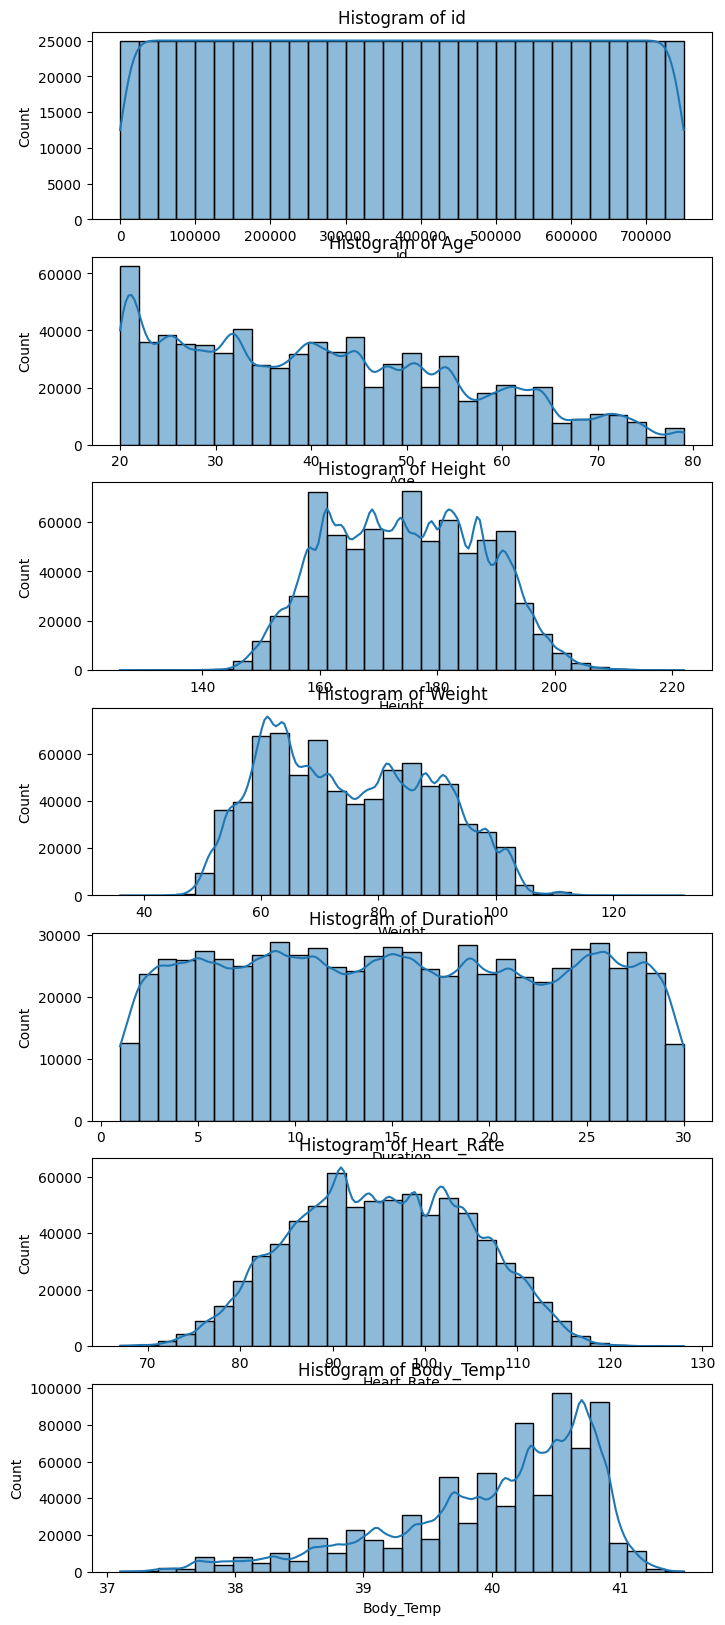

In [ ]:
#EDA PLOTS AND GRAPHS FOR STATISTICS
fig,axis=plt.subplots(nrows=7,ncols=1,figsize=(8,20))
for i,col in enumerate(train_df.select_dtypes(include=[np.number]).columns):
    sns.histplot(train_df[col],bins=30,kde=True,ax=axis[i])
    axis[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

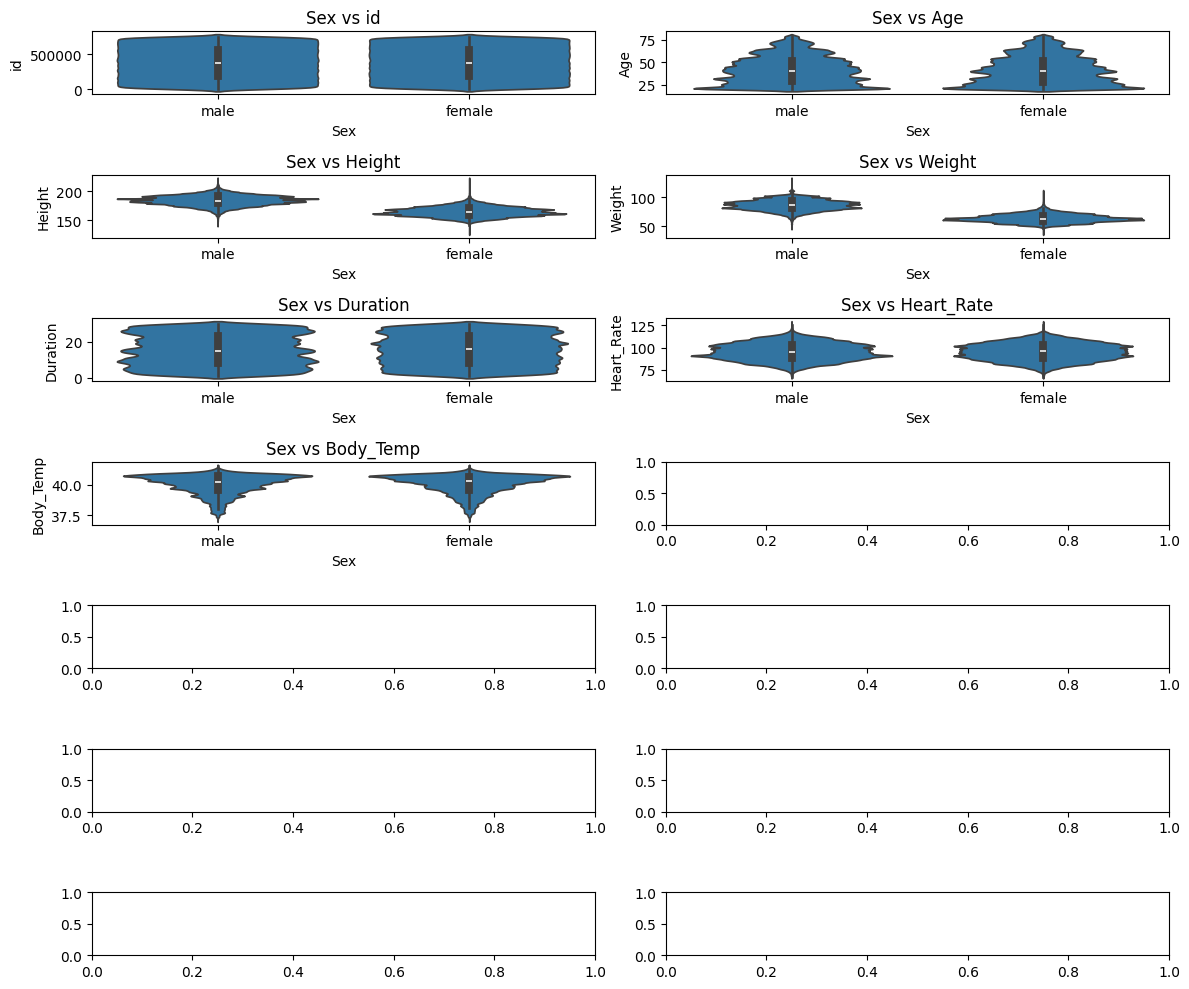

In [ ]:
fig, axis = plt.subplots(nrows=7, ncols=2, figsize=(12, 10))


axis = axis.reshape(7, 2)


numeric_cols = train_df.select_dtypes(include=[np.number]).drop('Calories', axis=1).columns

for i, feature in enumerate(numeric_cols):
    row = i // 2
    col_idx = i % 2
    sns.violinplot(x=train_df['Sex'], y=train_df[feature], ax=axis[row, col_idx])
    axis[row, col_idx].set_title(f'Sex vs {feature}')

plt.tight_layout()
plt.show()

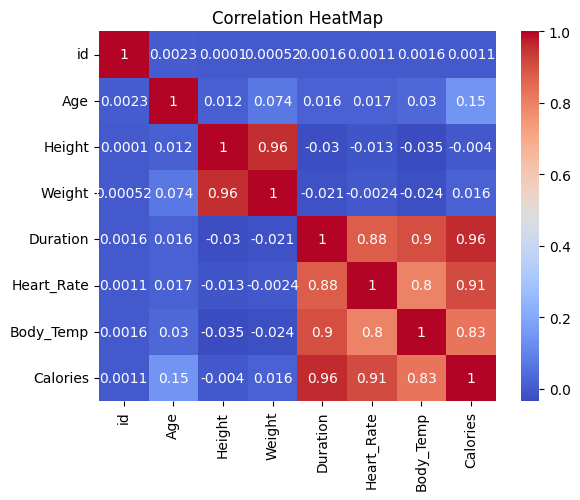

In [ ]:
sns.heatmap(train_df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation HeatMap")
plt.show()



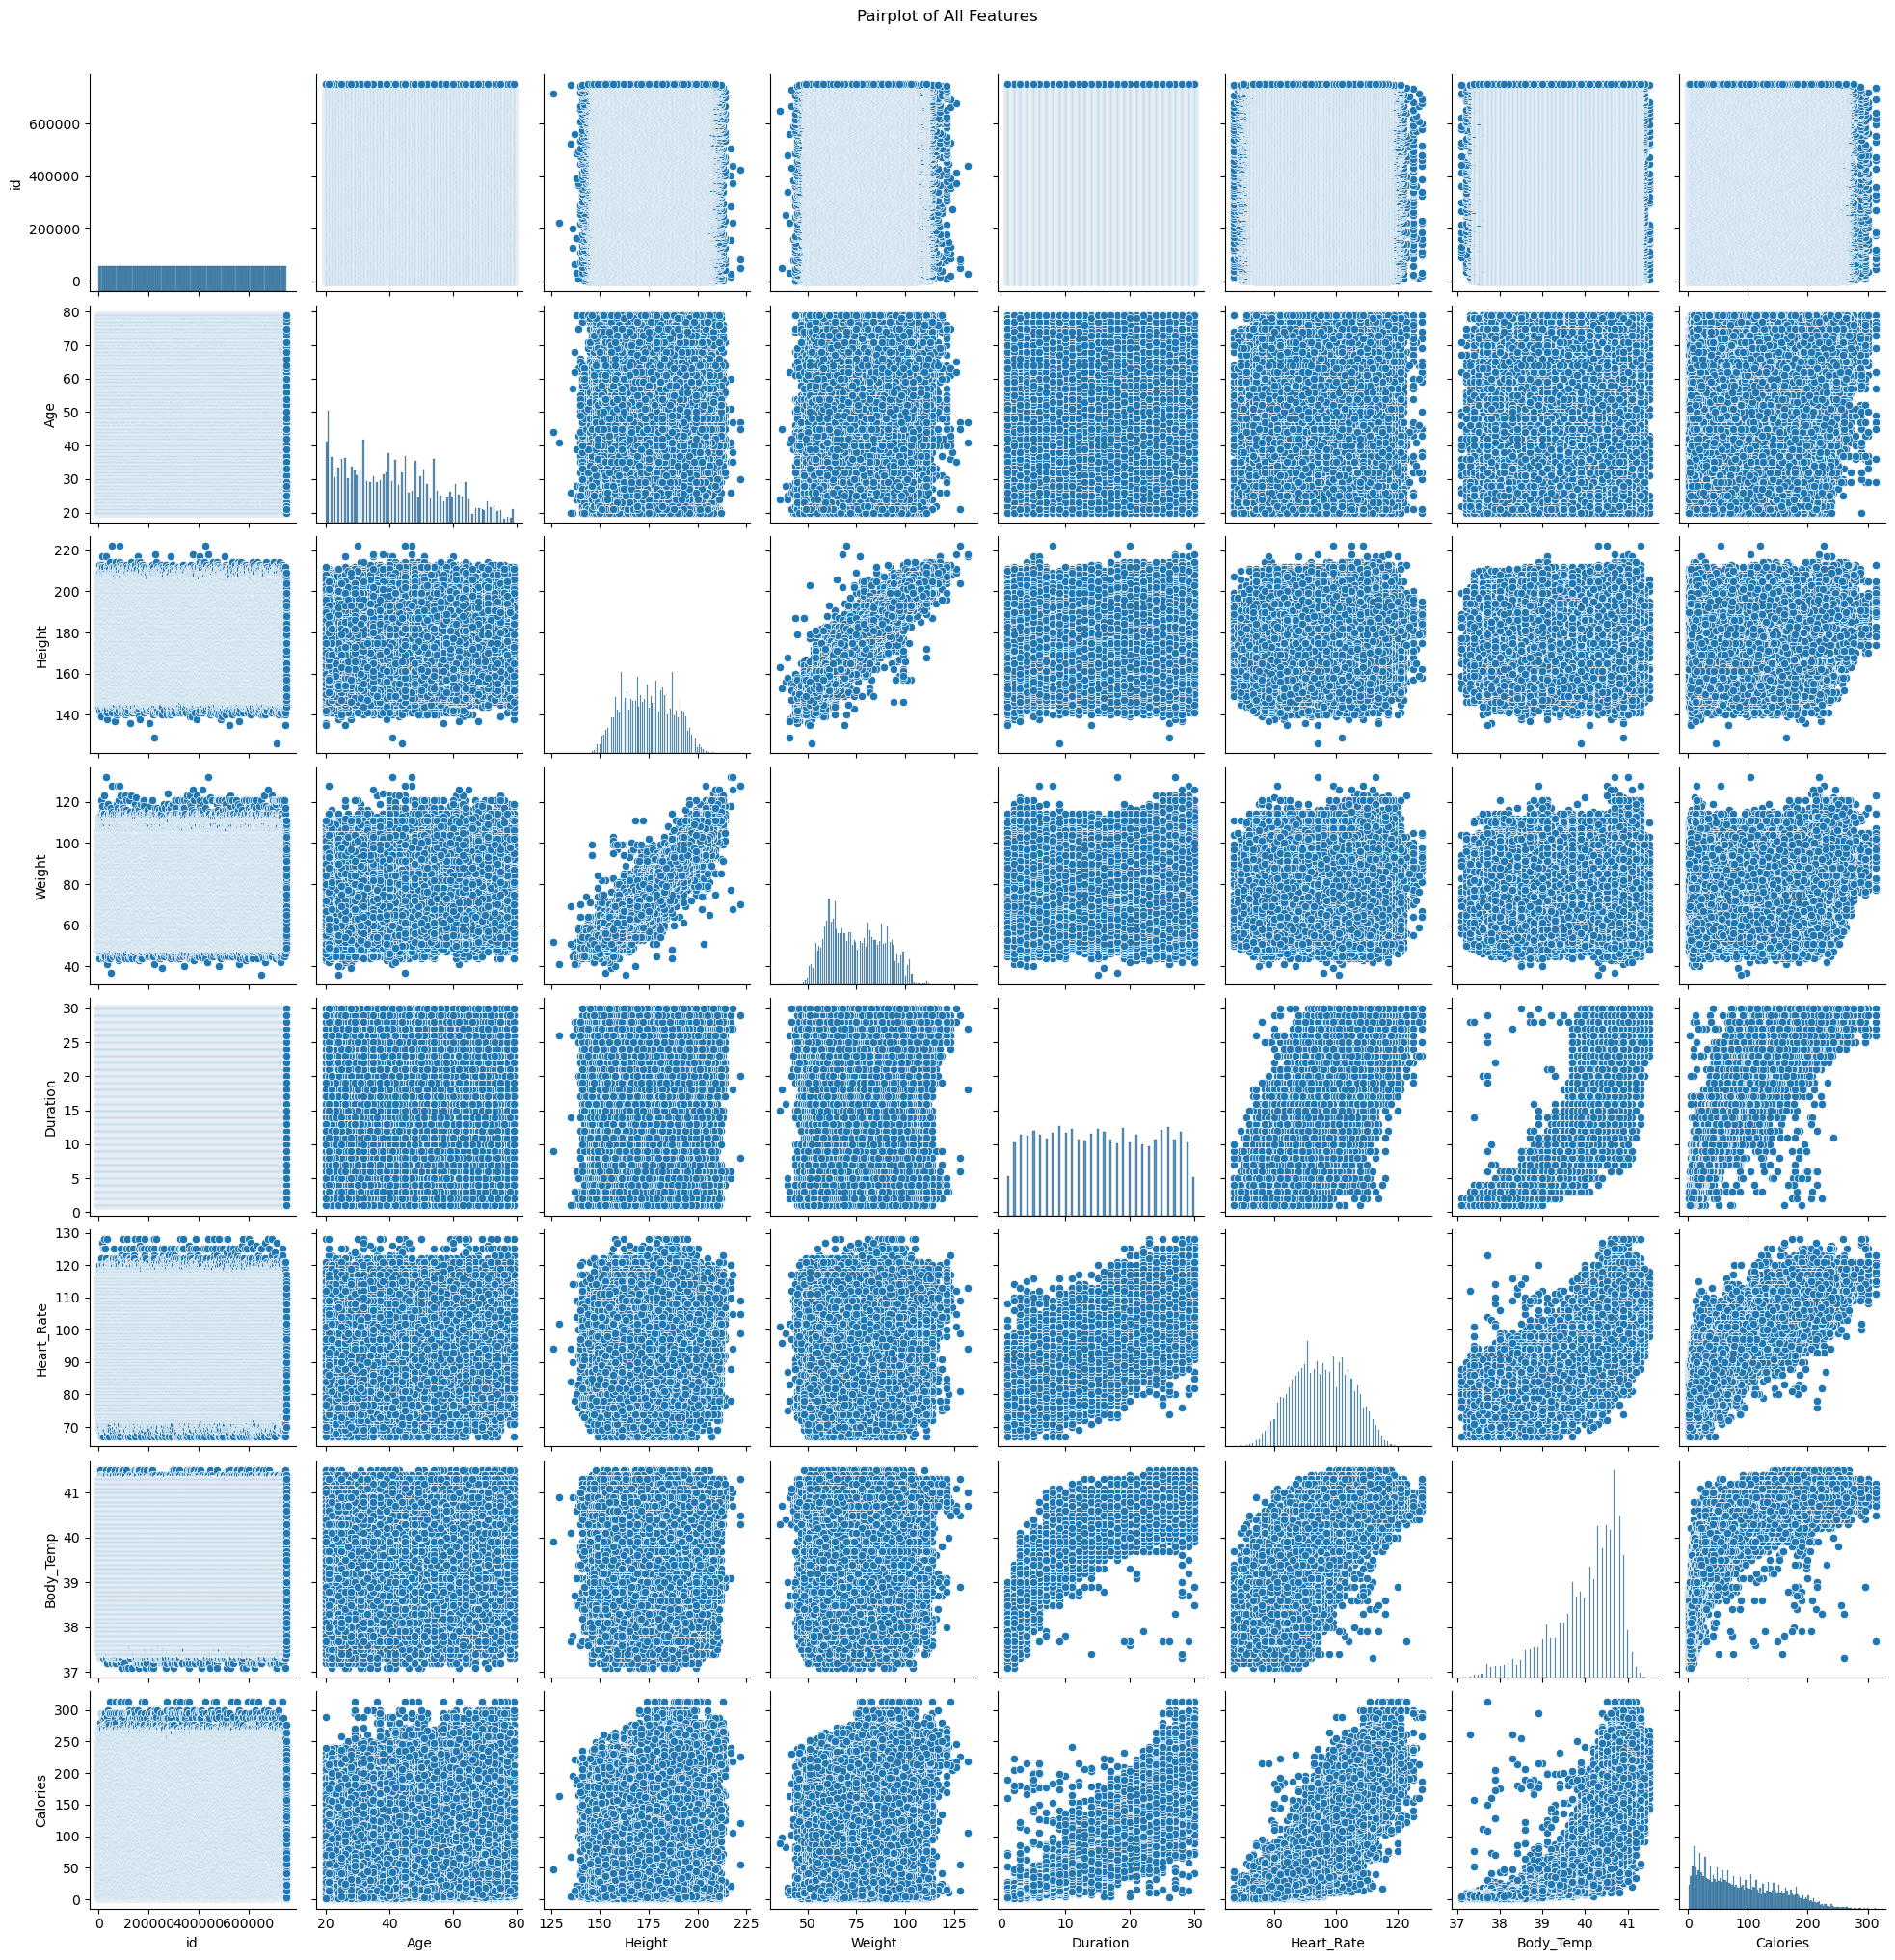

In [ ]:
sns.pairplot(train_df)
plt.suptitle("Pairplot of All Features",y=1.02)
plt.show()

FEATURES

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


label_enc = LabelEncoder()
label_enc.fit(train_df['Sex'])


train_df['Sex'] = label_enc.transform(train_df['Sex'])
test_df['Sex'] = label_enc.transform(test_df['Sex'])


def feature_engineering(data, numeric_cols):
    data['BMI'] = data['Weight'] / (data['Height'] / 100)**2
    data['Intensity'] = data['Heart_Rate'] / data['Duration']
    for i in range(len(numeric_cols)):
        f1 = numeric_cols[i]
        for j in range(i+1, len(numeric_cols)):
            f2 = numeric_cols[j]
            data[f'{f1}_x_{f2}'] = data[f1] * data[f2]
    return data


numeric_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']


train_df = feature_engineering(train_df, numeric_cols)
test_df = feature_engineering(test_df, numeric_cols)


X = train_df.drop(['Calories'], axis=1)
y = np.log1p(train_df['Calories'].values)

KMeans+PCA

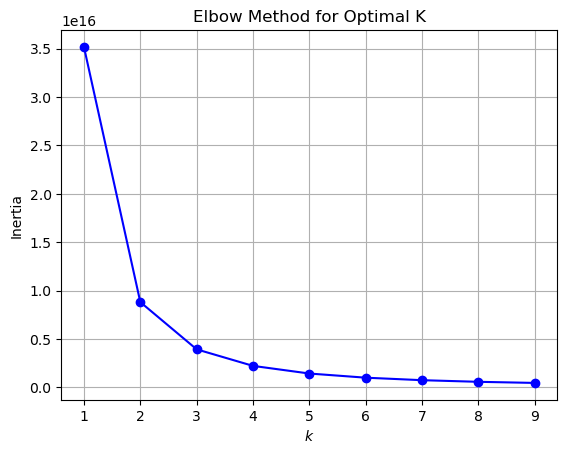

Accuracy between clusters and target groups:33.42%


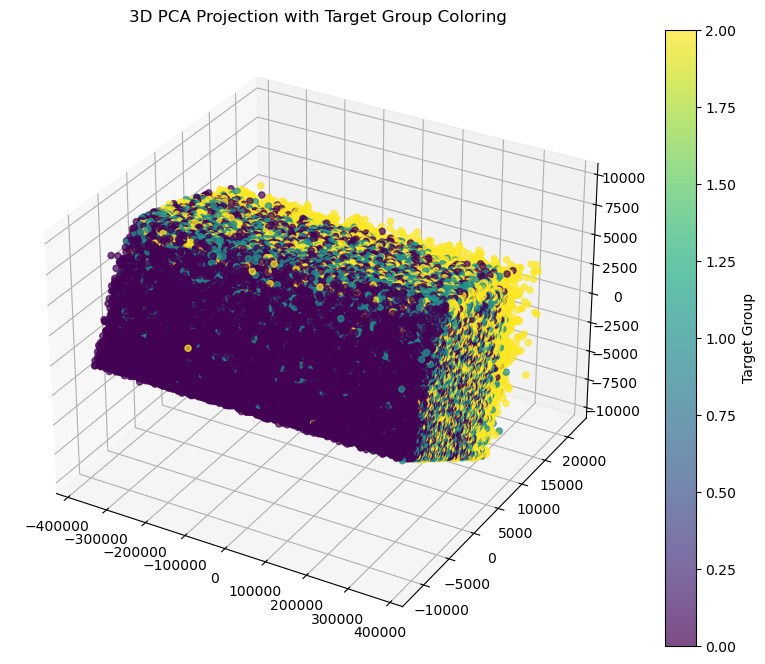

In [ ]:
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X.drop('Sex',axis=1))
kmeans_per_k=[KMeans(n_clusters=k,random_state=42).fit(X_pca) for k in range(1,10)]
inertias=[model.inertia_ for model in kmeans_per_k]
plt.plot(range(1,10),inertias,"bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid(True)
plt.title("Elbow Method for Optimal K")
plt.show()
kmeans=KMeans(n_clusters=3,random_state=42).fit(X_pca)
pca_df=pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3'])
pca_df['cluster']=kmeans.labels_
pca_df['target_group']=pd.qcut(train_df['Calories'],q=3,labels=False)
accuracy=(pca_df['cluster']==pca_df['target_group']).mean()
print(f"Accuracy between clusters and target groups:{accuracy:.2%}")
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['target_group'], cmap='viridis', alpha=0.7)
plt.title("3D PCA Projection with Target Group Coloring")
plt.colorbar(scatter, label='Target Group')
plt.show()


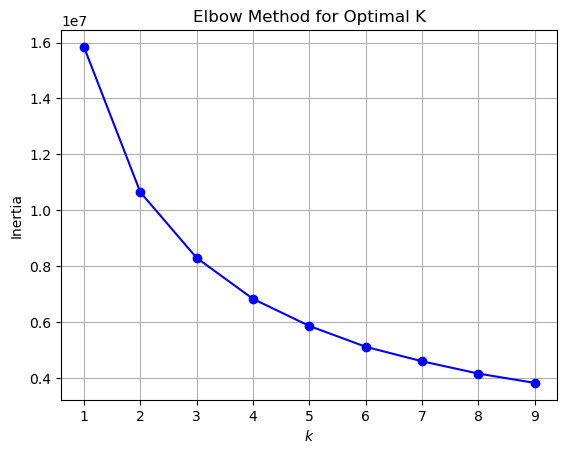

Adjusted Rand Index (ARI): 41.54%
Normalized Mutual Information (NMI): 44.20%


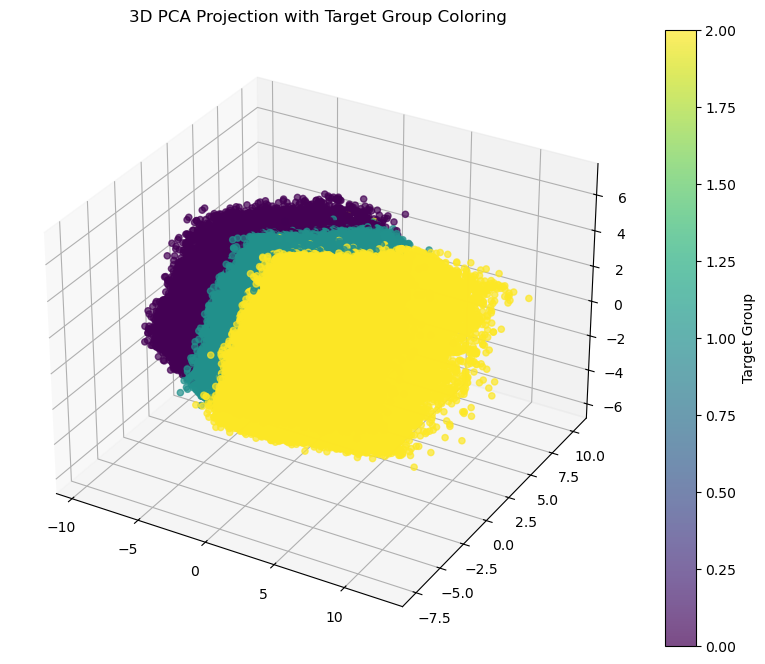

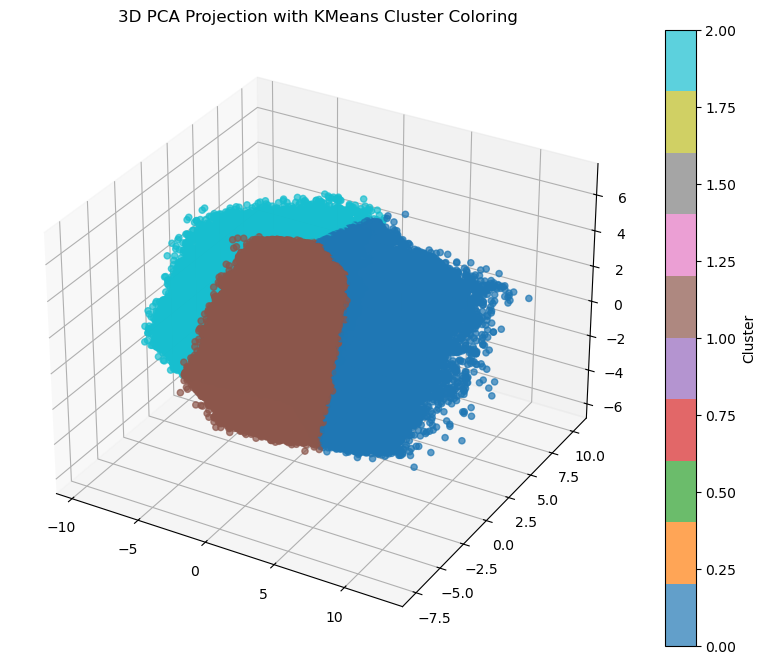

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Step 1: Drop non-numeric column and scale
X_features = X.drop('Sex', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Step 2: Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Elbow method to find optimal k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_pca) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid(True)
plt.title("Elbow Method for Optimal K")
plt.show()

# Step 4: Fit final KMeans with k=3 (or based on elbow)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_pca)

# Step 5: Create DataFrame with PCA and clustering info
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['cluster'] = kmeans.labels_
pca_df['target_group'] = pd.qcut(train_df['Calories'], q=3, labels=False)

# Step 6: Evaluate clustering performance
ari = adjusted_rand_score(pca_df['target_group'], pca_df['cluster'])
nmi = normalized_mutual_info_score(pca_df['target_group'], pca_df['cluster'])

print(f"Adjusted Rand Index (ARI): {ari:.2%}")
print(f"Normalized Mutual Information (NMI): {nmi:.2%}")

# Step 7: 3D PCA plot colored by target group
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'],
                     c=pca_df['target_group'], cmap='viridis', alpha=0.7)
ax.set_title("3D PCA Projection with Target Group Coloring")
plt.colorbar(scatter, label='Target Group')
plt.show()

# Step 8: 3D PCA plot colored by cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'],
                     c=pca_df['cluster'], cmap='tab10', alpha=0.7)
ax.set_title("3D PCA Projection with KMeans Cluster Coloring")
plt.colorbar(scatter, label='Cluster')
plt.show()

MODEL USING CatBoost+XGBoost+LightBGF

MODEL USING CATBOOST+XGBOOST+LIGHTBGM

In [ ]:
pip install lightgbm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
# Import EarlyStopping from xgboost.callback
from xgboost.callback import EarlyStopping
from lightgbm import LGBMRegressor, early_stopping

# ------------------ Assumed Setup ------------------
# X = train_df.drop(['Calories'], axis=1)
# y = np.log1p(train_df['Calories'].values)
# test_df = <your test data, preprocessed similarly to X>

FOLDS = 2
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

cat_preds = np.zeros((FOLDS, len(test_df)))
xgb_preds = np.zeros((FOLDS, len(test_df)))
lgbm_preds = np.zeros((FOLDS, len(test_df)))

oof_cat = np.zeros(len(X))
oof_xgb = np.zeros(len(X))
oof_lgbm = np.zeros(len(X))

# Optional: convert categorical columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
cat_idx = [X.columns.get_loc(col) for col in cat_cols]

for col in cat_cols:
    X[col] = X[col].astype('category')
    test_df[col] = test_df[col].astype('category')

# ---------------------- CV Loop ----------------------
for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y), 1):
    print(f"\n{'#'*15} Fold {fold} {'#'*15}")

    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_valid, y_valid = X.iloc[valid_idx], y[valid_idx]

    # ------------------ CatBoost (GPU) ------------------
    cat_model = CatBoostRegressor(
        iterations=3500,
        learning_rate=0.02,
        depth=12,
        l2_leaf_reg=3,
        verbose=1000,
        early_stopping_rounds=200,
        loss_function='RMSE',
        eval_metric='RMSE',
        task_type='GPU',
        devices='0'  # You can specify multiple GPUs like '0,1' if needed
    )
    cat_model.fit(
        X_train, y_train,
        eval_set=(X_valid, y_valid),
        use_best_model=True,
        cat_features=cat_idx
    )

    # ------------------ XGBoost (GPU) ------------------
    xgb_model = XGBRegressor(
        max_depth=10,
        n_estimators=2000,
        learning_rate=0.01,
        subsample=0.9,
        colsample_bytree=0.75,
        gamma=0.01,
        enable_categorical=True,
        tree_method="gpu_hist",  # <--- GPU acceleration
        predictor="gpu_predictor",
        eval_metric="rmse",
        verbosity=0,
        random_state=42,
        # Move early_stopping_rounds to the constructor
        # Pass a list containing the EarlyStopping callback instance
        # Removed the 'monitor' argument as it's not valid for the constructor
        callbacks=[EarlyStopping(rounds=100)]
    )
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)]
        # Remove callbacks from fit method
    )

    # ------------------ LightGBM (GPU optional) ------------------
    lgbm_model = LGBMRegressor(
        num_leaves=50,
        max_depth=10,
        learning_rate=0.01,
        n_estimators=3000,
        subsample=0.8,
        colsample_bytree=0.75,
        reg_alpha=1,
        reg_lambda=1,
        verbose=-1,
        device="gpu",  # Enable GPU for LightGBM (if compiled with GPU support)
        gpu_platform_id=0,
        gpu_device_id=0
    )
    lgbm_model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        callbacks=[early_stopping(100)]
    )

    # ------------------ OOF Predictions ------------------
    oof_cat[valid_idx] = cat_model.predict(X_valid)
    oof_xgb[valid_idx] = xgb_model.predict(X_valid)
    oof_lgbm[valid_idx] = lgbm_model.predict(X_valid)

    # ------------------ Test Predictions ------------------
    cat_preds[fold - 1] = cat_model.predict(test_df)
    xgb_preds[fold - 1] = xgb_model.predict(test_df)
    lgbm_preds[fold - 1] = lgbm_model.predict(test_df)

    # ------------------ Fold RMSE ------------------
    cat_rmse = np.sqrt(mean_squared_error(y_valid, oof_cat[valid_idx]))
    xgb_rmse = np.sqrt(mean_squared_error(y_valid, oof_xgb[valid_idx]))
    lgbm_rmse = np.sqrt(mean_squared_error(y_valid, oof_lgbm[valid_idx]))

    print(f'CAT_RMSE: {cat_rmse:.4f}, XGB_RMSE: {xgb_rmse:.4f}, LGBM_RMSE: {lgbm_rmse:.4f}')

# ---------------------- Final Predictions ----------------------
pred_cat = np.expm1(np.mean(cat_preds, axis=0))
pred_xgb = np.expm1(np.mean(xgb_preds, axis=0))
pred_lgbm = np.expm1(np.mean(lgbm_preds, axis=0))

# Weighted Ensemble
final_pred = pred_cat * 0.3 + pred_xgb * 0.3 + pred_lgbm * 0.4
final_pred = np.clip(final_pred, 1, 314)


############### Fold 1 ###############
0:	learn: 0.9438360	test: 0.9451799	best: 0.9451799 (0)	total: 41.6ms	remaining: 2m 25s
1000:	learn: 0.0551433	test: 0.0602098	best: 0.0602096 (999)	total: 27.1s	remaining: 1m 7s
bestTest = 0.06014052013
bestIteration = 1589
Shrink model to first 1590 iterations.
[0]	validation_0-rmse:0.95436
[1]	validation_0-rmse:0.94491
[2]	validation_0-rmse:0.93555
[3]	validation_0-rmse:0.92629
[4]	validation_0-rmse:0.91711
[5]	validation_0-rmse:0.90804
[6]	validation_0-rmse:0.89905
[7]	validation_0-rmse:0.89014
[8]	validation_0-rmse:0.88134
[9]	validation_0-rmse:0.87262
[10]	validation_0-rmse:0.86398
[11]	validation_0-rmse:0.85544
[12]	validation_0-rmse:0.84698
[13]	validation_0-rmse:0.83860
[14]	validation_0-rmse:0.83030
[15]	validation_0-rmse:0.82208
[16]	validation_0-rmse:0.81396
[17]	validation_0-rmse:0.80591
[18]	validation_0-rmse:0.79795
[19]	validation_0-rmse:0.79006
[20]	validation_0-rmse:0.78225
[21]	validation_0-rmse:0.77453
[22]	validation_0-rmse:0